In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
pd.set_option('display.max_rows', 500)
#mpl.rcParams['figure.figsize'] = (20, 16)
mpl.rcParams['figure.figsize'] = (16, 9)
sns.set(style="darkgrid")

# Explorative Data Analysis
1) focus is often a visual representation of the data

In [3]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep=';')
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


<Figure size 1152x648 with 0 Axes>

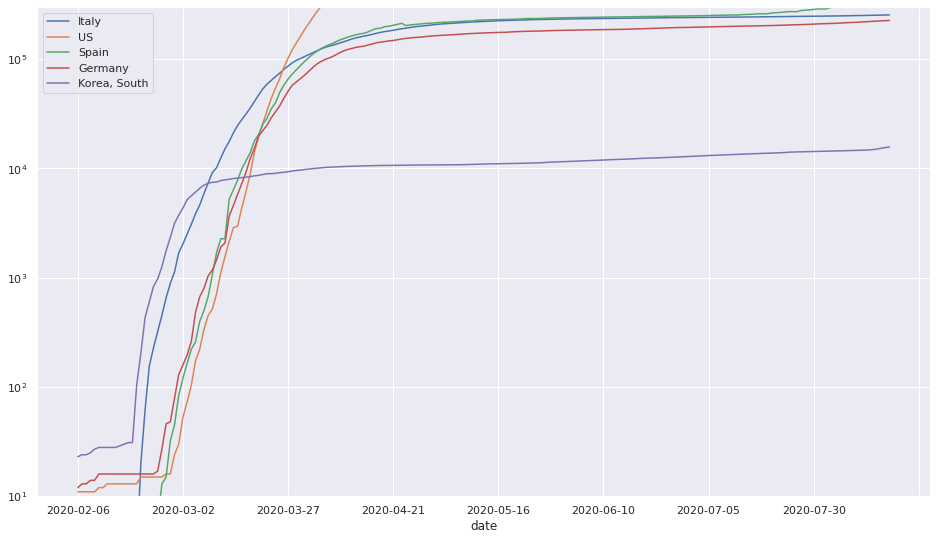

In [4]:
plt.figure()
ax = df_plot.iloc[15:,:].set_index('date').plot()
plt.ylim(10, 300000)
ax.set_yscale('log')

# Plot.ly

In [5]:
import plotly.graph_objects as go
import plotly


In [6]:
country_list = [
    'Italy',
    'US',
    'Spain',
    'Germany',
    'Korea, South'
]

In [7]:
# defines how to plot individual trace
fig = go.Figure()
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                            y=df_plot[each],
                            mode = "markers+lines",
                            name = each,
                            line_width = 2,
                            marker_size = 4,
                            opacity = 0.9                             
                            )
                 )

# defines the overall layout properties
fig.update_layout(
    width = 1000, # 1600
    height = 800, # 1200
    xaxis_title = "Time",
    yaxis_title = "Confirmed infected people (source johns hopkins case, log-scale)"
    )
fig.update_yaxes(type="log", range=[0, 7])

fig.update_layout(xaxis_rangeslider_visible = True)
fig.show(renderer='firefox')

In [8]:
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id = 'country_drop_down',
        options=[
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'Germany', 'value': 'Germany'},
            {'label': 'Korea, South', 'value': 'Korea, South'},
        ],
        value = ['US', 'Germany'], # which are pre-selected
        multi = True
    ),
    dcc.Graph(
            figure=fig,
            id = 'main_window_slope'     
     )
])




In [9]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')]
)

def update_figure(country_list):
    
    traces = []
    
    for each in country_list:
        traces.append(
            dict(
                x = df_plot.date,
                y =  df_plot[each],
                mode = "markers+lines",
                name = each,
                line_width = 2,
                marker_size = 4,
                opacity = 0.9
            )
    )
        
    return{
        'data': traces,
        'layout': dict(
            width = 1600, # 1600
            height = 800, # 1200
            xaxis_title = "Time",
            yaxis_title = "Confirmed infected people (source johns hopkins case, log-scale)",
            xaxis = {
                'tickangle': -45,
                'nticks': 20,
                'tickfront': dict(size = 14, color="#7f7f7f")
            },
            yaxis = {
                'type' : 'log',
                'range' : '[0, 7]'
            }
        )
    }

In [11]:
app.run_server(debug=True, use_reloader=False) # Turn of reloader if inside Jupyter

Running on http://127.0.0.1:8050/
Debugger PIN: 557-208-866
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
